In [1]:
import pandas as pd
import numpy as np

In [ ]:
diagnoses_icd=pd.read_csv('../data/hosp/diagnoses_icd.csv')
patients=pd.read_csv('../data/hosp/patients.csv')
admissions=pd.read_csv('../data/hosp/admissions.csv')
chartevents = pd.read_csv('../data/chartevents.csv')
labevents = pd.read_csv('../data/hosp/labevents.csv')

In [21]:

#입원, 퇴원 날짜 기준으로 입원 기간 length_of_stay

admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])
admissions['length_of_stay'] = (admissions['dischtime'] - admissions['admittime']).dt.days

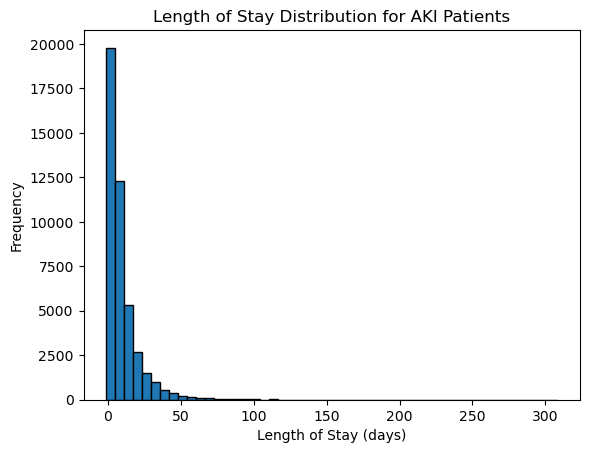

count    44293.000000
mean        10.182602
std         12.873392
min         -1.000000
25%          3.000000
50%          6.000000
75%         13.000000
max        308.000000
Name: length_of_stay, dtype: float64


In [28]:
import matplotlib.pyplot as plt


AKI_icd_codes = ['5851','5860','5845', '5846', '5847', '5848', 'N170', 'N171', 'N172', 'N178', 'N179'] # 급성 신손상에 해당하는 코드
aki_hadm_ids = diagnoses_icd[diagnoses_icd['icd_code'].isin(AKI_icd_codes)]['hadm_id']
aki_admissions = admissions[admissions['hadm_id'].isin(aki_hadm_ids)]

plt.hist(aki_admissions['length_of_stay'], bins=50, edgecolor='black')
plt.title('Length of Stay Distribution for AKI Patients')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

# 분포에 대한 통계 정보 출력
print(aki_admissions['length_of_stay'].describe())

In [30]:
#입원 기간 7일 이상 30일 이하인 환자만 사용, list up
data = admissions[(admissions['length_of_stay'] >= 7) & (admissions['length_of_stay'] <= 14)]
data = data[['subject_id', 'hadm_id', 'length_of_stay']]

,subject_id,hadm_id,length_of_stay
16,10000690,23280645,7
17,10000690,25860671,9
25,10000883,25221576,7
33,10000935,29541074,7
38,10000980,25242409,7
...,...,...,...
545985,19999442,25345411,8
546010,19999784,25715748,8
546012,19999784,26194817,13
546023,19999828,25744818,10


In [ ]:
#chartevents에서 사용할 입원 아이디의 정보만 
chartevents = chartevents[chartevents['hadm_id'].isin(data['hadm_id'])]

In [3]:
chartevents=chartevents.drop(['stay_id', 'caregiver_id','storetime'], axis=1)

In [9]:
#day 기준 시간 정보만 남기기
chartevents['chartdate'] = pd.to_datetime(chartevents['charttime']).dt.date
chartevents.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning,chartdate
0,10000032,29079034,39553978,18704.0,2180-07-23 12:36:00,2180-07-23 14:45:00,226512,39.4,39.4,kg,0.0,2180-07-23
1,10000032,29079034,39553978,18704.0,2180-07-23 12:36:00,2180-07-23 14:45:00,226707,60,60.0,Inch,0.0,2180-07-23
2,10000032,29079034,39553978,18704.0,2180-07-23 12:36:00,2180-07-23 14:45:00,226730,152,152.0,cm,0.0,2180-07-23
3,10000032,29079034,39553978,18704.0,2180-07-23 14:00:00,2180-07-23 14:18:00,220048,SR (Sinus Rhythm),NaN,NaN,0.0,2180-07-23
4,10000032,29079034,39553978,18704.0,2180-07-23 14:00:00,2180-07-23 14:18:00,224642,Oral,NaN,NaN,0.0,2180-07-23


## patient 처리

In [ ]:
pharmacy=pd.read_csv('../data/hosp/pharmacy.csv')

In [6]:
medications = [
    "Acetaminophen", "Ibuprofen", "Aspirin", "Naproxen",
    "Acyclovir",
    "Gentamycin", "Amikacin",
    "Propranolol", "Atenolol", "Carvedilol", "Labetalol",
    "Amlodipine", "Diltiazem", "Verapamil",
    "Oxaliplatin",
    "Vancomycin",
    "Colistin",
    "Cyclosporine",
    "Furosemide",
    "Valsartan", "Lisinopril", "Ramipril",
    "Vasopressin",
    "Atorvastatin", "Simvastatin", "Pravastatin",
    "Amphotericin B"
]

pharmacy['medicine'] = pharmacy['medication'].apply(lambda x: 1 if x in medications else 0)

# subject_id 기준으로 그룹화하여 medicine 컬럼 계산
patients_data = pharmacy.groupby('subject_id')['medicine'].max().reset_index()
patients_data

,subject_id,medicine
0,10000032,1
1,10000084,1
2,10000117,1
3,10000248,1
4,10000560,1
...,...,...
196733,19999625,0
196734,19999784,1
196735,19999828,1
196736,19999840,1


In [7]:
patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000058,F,33,2168,2020 - 2022,NaN
3,10000068,F,19,2160,2008 - 2010,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13
...,...,...,...,...,...,...
364622,19999828,F,46,2147,2017 - 2019,NaN
364623,19999829,F,28,2186,2008 - 2010,NaN
364624,19999840,M,58,2164,2008 - 2010,2164-09-17
364625,19999914,F,49,2158,2017 - 2019,NaN


In [8]:
# 신장 영향 약 
patients['medicine'] = patients['subject_id'].isin(patients_data['subject_id']).astype(int)
patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,medicine
0,10000032,F,52,2180,2014 - 2016,2180-09-09,1
1,10000048,F,23,2126,2008 - 2010,NaN,0
2,10000058,F,33,2168,2020 - 2022,NaN,0
3,10000068,F,19,2160,2008 - 2010,NaN,0
4,10000084,M,72,2160,2017 - 2019,2161-02-13,1
...,...,...,...,...,...,...,...
364622,19999828,F,46,2147,2017 - 2019,NaN,1
364623,19999829,F,28,2186,2008 - 2010,NaN,0
364624,19999840,M,58,2164,2008 - 2010,2164-09-17,1
364625,19999914,F,49,2158,2017 - 2019,NaN,0


In [9]:
#진단받은 질병코드 

icd_codes = diagnoses_icd.groupby('subject_id')['icd_code'].apply(lambda x: ', '.join(x)).reset_index()

# patients 데이터프레임에 icd_code 칼럼 추가
patients = patients.merge(icd_codes, on='subject_id', how='left')
patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,medicine,icd_code
0,10000032,F,52,2180,2014 - 2016,2180-09-09,1,"5723, 78959, 5715, 07070, 496, 29680, 30981, V..."
1,10000048,F,23,2126,2008 - 2010,NaN,0,NaN
2,10000058,F,33,2168,2020 - 2022,NaN,0,NaN
3,10000068,F,19,2160,2008 - 2010,NaN,0,30500
4,10000084,M,72,2160,2017 - 2019,2161-02-13,1,"G3183, F0280, R441, R296, E785, Z8546, R4182, ..."
...,...,...,...,...,...,...,...,...
364622,19999828,F,46,2147,2017 - 2019,NaN,1,"T8141XA, E1110, K632, D682, L02211, T83728A, Y..."
364623,19999829,F,28,2186,2008 - 2010,NaN,0,NaN
364624,19999840,M,58,2164,2008 - 2010,2164-09-17,1,"3453, 51881, 5070, 5180, 42741, 43821, 43811, ..."
364625,19999914,F,49,2158,2017 - 2019,NaN,0,NaN


In [10]:
#인종

admissions_filtered = admissions.groupby('subject_id', as_index=False).first()[['subject_id', 'race']]
patients = patients.merge(admissions_filtered, on='subject_id', how='left')
patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,medicine,icd_code,race
0,10000032,F,52,2180,2014 - 2016,2180-09-09,1,"5723, 78959, 5715, 07070, 496, 29680, 30981, V...",WHITE
1,10000032,F,52,2180,2014 - 2016,2180-09-09,1,"5723, 78959, 5715, 07070, 496, 29680, 30981, V...",WHITE
2,10000032,F,52,2180,2014 - 2016,2180-09-09,1,"5723, 78959, 5715, 07070, 496, 29680, 30981, V...",WHITE
3,10000032,F,52,2180,2014 - 2016,2180-09-09,1,"5723, 78959, 5715, 07070, 496, 29680, 30981, V...",WHITE
4,10000048,F,23,2126,2008 - 2010,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
687198,19999829,F,28,2186,2008 - 2010,NaN,0,NaN,NaN
687199,19999840,M,58,2164,2008 - 2010,2164-09-17,1,"3453, 51881, 5070, 5180, 42741, 43821, 43811, ...",WHITE
687200,19999840,M,58,2164,2008 - 2010,2164-09-17,1,"3453, 51881, 5070, 5180, 42741, 43821, 43811, ...",WHITE
687201,19999914,F,49,2158,2017 - 2019,NaN,0,NaN,NaN


In [15]:
patients = patients.drop_duplicates(subset='subject_id', keep='first')
patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,medicine,icd_code,race,weight
0,10000032,F,52,2180,2014 - 2016,2180-09-09,1,"5723, 78959, 5715, 07070, 496, 29680, 30981, V...",WHITE,39.4
4,10000048,F,23,2126,2008 - 2010,NaN,0,NaN,NaN,NaN
5,10000058,F,33,2168,2020 - 2022,NaN,0,NaN,NaN,NaN
6,10000068,F,19,2160,2008 - 2010,NaN,0,30500,WHITE,NaN
7,10000084,M,72,2160,2017 - 2019,2161-02-13,1,"G3183, F0280, R441, R296, E785, Z8546, R4182, ...",WHITE,NaN
...,...,...,...,...,...,...,...,...,...,...
687196,19999828,F,46,2147,2017 - 2019,NaN,1,"T8141XA, E1110, K632, D682, L02211, T83728A, Y...",WHITE,67.9
687198,19999829,F,28,2186,2008 - 2010,NaN,0,NaN,NaN,NaN
687199,19999840,M,58,2164,2008 - 2010,2164-09-17,1,"3453, 51881, 5070, 5180, 42741, 43821, 43811, ...",WHITE,77.5
687201,19999914,F,49,2158,2017 - 2019,NaN,0,NaN,NaN,NaN


In [22]:
#weight

chartevents_filtered = chartevents[chartevents['itemid'].isin([224639, 226512])][['subject_id', 'value']]

# 첫 번째 value만 사용하도록 그룹화
chartevents_filtered = chartevents_filtered.groupby('subject_id', as_index=False).first()

# 2. data에 chartevents_filtered의 'value'를 'weight' 컬럼으로 병합 (row 증가 방지)
patients = patients.merge(chartevents_filtered, on='subject_id', how='left')

# 3. 'value' 컬럼을 'weight'로 이름 변경
patients.rename(columns={'value': 'weight'}, inplace=True)

# 결과 확인
patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,medicine,icd_code,race,weight
0,10000032,F,52,2180,2014 - 2016,2180-09-09,1,"5723, 78959, 5715, 07070, 496, 29680, 30981, V...",WHITE,39.4
1,10000048,F,23,2126,2008 - 2010,NaN,0,NaN,NaN,NaN
2,10000058,F,33,2168,2020 - 2022,NaN,0,NaN,NaN,NaN
3,10000068,F,19,2160,2008 - 2010,NaN,0,30500,WHITE,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13,1,"G3183, F0280, R441, R296, E785, Z8546, R4182, ...",WHITE,NaN
...,...,...,...,...,...,...,...,...,...,...
364622,19999828,F,46,2147,2017 - 2019,NaN,1,"T8141XA, E1110, K632, D682, L02211, T83728A, Y...",WHITE,67.9
364623,19999829,F,28,2186,2008 - 2010,NaN,0,NaN,NaN,NaN
364624,19999840,M,58,2164,2008 - 2010,2164-09-17,1,"3453, 51881, 5070, 5180, 42741, 43821, 43811, ...",WHITE,77.5
364625,19999914,F,49,2158,2017 - 2019,NaN,0,NaN,NaN,NaN


In [26]:
patients=patients.drop('height', axis=1)

In [27]:
#height inch>cm로 바꿔서 다 cm로

# 1. chartevents에서 itemid가 226707 (cm) 또는 226730 (inch)인 데이터 필터링
chartevents_filtered = chartevents[chartevents['itemid'].isin([226707, 226730])][['subject_id', 'value', 'itemid']]

# 2. 'value'를 숫자로 변환 (변환할 수 없는 값은 NaN으로 설정)
chartevents_filtered['value'] = pd.to_numeric(chartevents_filtered['value'], errors='coerce')

# 3. 인치 값을 센티미터로 변환
chartevents_filtered['value'] = chartevents_filtered.apply(
    lambda row: row['value'] * 2.54 if row['itemid'] == 226707 else row['value'],
    axis=1
)

# 4. 첫 번째 value만 사용하도록 그룹화
chartevents_filtered = chartevents_filtered.groupby('subject_id', as_index=False).first()

# 5. data에 chartevents_filtered의 'value'를 'weight' 컬럼으로 병합 (row 증가 방지)
patients = patients.merge(chartevents_filtered[['subject_id', 'value']], on='subject_id', how='left')

# 6. 'value' 컬럼을 'weight'로 이름 변경
patients.rename(columns={'value': 'height'}, inplace=True)

# 결과 확인
patients



,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,medicine,icd_code,race,weight,height
0,10000032,F,52,2180,2014 - 2016,2180-09-09,1,"5723, 78959, 5715, 07070, 496, 29680, 30981, V...",WHITE,39.4,152.4
1,10000048,F,23,2126,2008 - 2010,NaN,0,NaN,NaN,NaN,NaN
2,10000058,F,33,2168,2020 - 2022,NaN,0,NaN,NaN,NaN,NaN
3,10000068,F,19,2160,2008 - 2010,NaN,0,30500,WHITE,NaN,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13,1,"G3183, F0280, R441, R296, E785, Z8546, R4182, ...",WHITE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
364622,19999828,F,46,2147,2017 - 2019,NaN,1,"T8141XA, E1110, K632, D682, L02211, T83728A, Y...",WHITE,67.9,NaN
364623,19999829,F,28,2186,2008 - 2010,NaN,0,NaN,NaN,NaN,NaN
364624,19999840,M,58,2164,2008 - 2010,2164-09-17,1,"3453, 51881, 5070, 5180, 42741, 43821, 43811, ...",WHITE,77.5,177.8
364625,19999914,F,49,2158,2017 - 2019,NaN,0,NaN,NaN,NaN,NaN


In [5]:
patients['icd_code']=patients['icd_code'].fillna('')
patients['icd_code'] = patients['icd_code'].apply(lambda x: x.split(', '))
AKI_icd_codes = ['5851','5860','5845', '5846', '5847', '5848', 'N170', 'N171', 'N172', 'N178', 'N179']
CKD_icd_codes = ['5851', '5852', '5853', '5854', '5855', 'N181', 'N182', 'N183', 'N184', 'N185', 'N186', 'N189']

In [6]:
patients['diagnose'] = 0  # 기본값 0으로 설정

for index, row in patients.iterrows():
    has_aki = any(code in AKI_icd_codes for code in row['icd_code'])
    has_ckd = any(code in CKD_icd_codes for code in row['icd_code'])

    if has_aki and has_ckd:
        patients.at[index, 'diagnose'] = 3
    elif has_aki:
        patients.at[index, 'diagnose'] = 1
    elif has_ckd:
        patients.at[index, 'diagnose'] = 2
patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,medicine,icd_code,race,weight,height,diagnose
0,10000032,F,52,2180,2014 - 2016,2180-09-09,1,"[5723, 78959, 5715, 07070, 496, 29680, 30981, ...",WHITE,39.4,152.4,0
1,10000048,F,23,2126,2008 - 2010,NaN,0,[],NaN,NaN,NaN,0
2,10000058,F,33,2168,2020 - 2022,NaN,0,[],NaN,NaN,NaN,0
3,10000068,F,19,2160,2008 - 2010,NaN,0,[30500],WHITE,NaN,NaN,0
4,10000084,M,72,2160,2017 - 2019,2161-02-13,1,"[G3183, F0280, R441, R296, E785, Z8546, R4182,...",WHITE,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
364622,19999828,F,46,2147,2017 - 2019,NaN,1,"[T8141XA, E1110, K632, D682, L02211, T83728A, ...",WHITE,67.9,NaN,0
364623,19999829,F,28,2186,2008 - 2010,NaN,0,[],NaN,NaN,NaN,0
364624,19999840,M,58,2164,2008 - 2010,2164-09-17,1,"[3453, 51881, 5070, 5180, 42741, 43821, 43811,...",WHITE,77.5,177.8,0
364625,19999914,F,49,2158,2017 - 2019,NaN,0,[],NaN,NaN,NaN,0


In [7]:
patients['gender'] = patients['gender'].map({'M': 0, 'F': 1})
patients.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,medicine,icd_code,race,weight,height,diagnose
0,10000032,1,52,2180,2014 - 2016,2180-09-09,1,"[5723, 78959, 5715, 07070, 496, 29680, 30981, ...",WHITE,39.4,152.4,0
1,10000048,1,23,2126,2008 - 2010,NaN,0,[],NaN,NaN,NaN,0
2,10000058,1,33,2168,2020 - 2022,NaN,0,[],NaN,NaN,NaN,0
3,10000068,1,19,2160,2008 - 2010,NaN,0,[30500],WHITE,NaN,NaN,0
4,10000084,0,72,2160,2017 - 2019,2161-02-13,1,"[G3183, F0280, R441, R296, E785, Z8546, R4182,...",WHITE,NaN,NaN,0


In [8]:
patients['diagnose'].value_counts()

0    326405
1     16858
3     11384
2      9980
Name: diagnose, dtype: int64

In [ ]:
patients.to_csv('patients1.csv',index = False)